In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

path1 = '/content/drive/My Drive/CapstoneWalks/Center150Dim_1250Steps_Walks.h5'
path2 = '/content/drive/My Drive/CapstoneWalks/Center150Dim_1250Steps_Walks_Test.h5'


large_train = read_one_hdf5(path1)
large_test= read_one_hdf5(path2)

#walk_imgs,count_imgs = read_many_hdf5()

#x_train_Walks, x_test_Walks, x_train_Counts, x_test_Counts, y_train, y_test = process_loaded_data(img_rows, img_cols,in_channel)

OSError: ignored

In [3]:
#Using grayscale images
in_channel = 1

img_rows, img_cols = 150, 150
steps = 1250
num_images = 70000
num_targets = 4 

large_train.shape

(60000, 150, 150)

In [4]:
large_train = large_train/steps
large_test = large_test/steps

large_train = large_train.reshape(large_train.shape[0], img_rows*img_cols)
large_test = large_test.reshape(large_test.shape[0], img_rows*img_cols)


In [6]:
encode_size = 49

In [7]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape=(img_rows*img_cols), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_active_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=encode_size, name="encoder_dense_2")(encoder_active_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)


In [8]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 22500)]           0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               6750300   
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 49)                14749     
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 49)                0         
Total params: 6,765,049
Trainable params: 6,765,049
Non-trainable params: 0
_________________________________________________________________


In [9]:
decoder_input = tensorflow.keras.layers.Input(shape=(encode_size), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_active_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=img_rows*img_cols, name="decoder_dense_2")(decoder_active_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [10]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 49)]              0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               15000     
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 22500)             6772500   
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 22500)             0         
Total params: 6,787,500
Trainable params: 6,787,500
Non-trainable params: 0
_________________________________________________________________


In [11]:
ae_input = tensorflow.keras.layers.Input(shape=(img_rows*img_cols), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 22500)]           0         
_________________________________________________________________
encoder_model (Functional)   (None, 49)                6765049   
_________________________________________________________________
decoder_model (Functional)   (None, 22500)             6787500   
Total params: 13,552,549
Trainable params: 13,552,549
Non-trainable params: 0
_________________________________________________________________


In [12]:
import tensorflow.keras.optimizers  
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

In [13]:
ae.fit(large_train, large_train, epochs=30, batch_size=20, 
       shuffle=False, validation_data=(large_test, large_test))

Epoch 1/30
3000/3000 [==============================] - 12s 4ms/step - loss: 5.4465e-06 - val_loss: 1.2582e-06
Epoch 2/30
3000/3000 [==============================] - 10s 3ms/step - loss: 1.0331e-06 - val_loss: 6.3292e-07
Epoch 3/30
3000/3000 [==============================] - 10s 3ms/step - loss: 5.3081e-07 - val_loss: 3.7836e-07
Epoch 4/30
3000/3000 [==============================] - 10s 3ms/step - loss: 3.4858e-07 - val_loss: 2.9711e-07
Epoch 5/30
3000/3000 [==============================] - 10s 3ms/step - loss: 2.8837e-07 - val_loss: 2.6383e-07
Epoch 6/30
3000/3000 [==============================] - 10s 3ms/step - loss: 2.6028e-07 - val_loss: 2.4301e-07
Epoch 7/30
3000/3000 [==============================] - 10s 3ms/step - loss: 2.4142e-07 - val_loss: 2.2720e-07
Epoch 8/30
3000/3000 [==============================] - 10s 3ms/step - loss: 2.2634e-07 - val_loss: 2.1360e-07
Epoch 9/30
3000/3000 [==============================] - 10s 3ms/step - loss: 2.1290e-07 - val_loss: 2.0123e-07
E

In [14]:
encoded_images_training = encoder.predict(large_train)
encoded_images_testing = encoder.predict(large_test)
decoded_images_training = decoder.predict(encoded_images_training)
decoded_images_testing = decoder.predict(encoded_images_testing)


In [15]:
decoded_images_training = np.reshape(decoded_images_training, newshape=(decoded_images_training.shape[0], img_rows, img_cols))
decoded_images_testing = np.reshape(decoded_images_testing, newshape=(decoded_images_testing.shape[0], img_rows, img_cols))

large_train = np.reshape(large_train, newshape=(large_train.shape[0], img_rows, img_cols))
large_test = np.reshape(large_test, newshape=(large_test.shape[0], img_rows, img_cols))


encoded_images_training = np.reshape(encoded_images_training, newshape=(encoded_images_training.shape[0], 7, 7))
encoded_images_testing = np.reshape(encoded_images_testing, newshape=(encoded_images_testing.shape[0], 7, 7))

In [2]:
num_images_to_show = 1
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=large_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(large_train[rand_ind, :, :], cmap="viridis")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(encoded_images_training[rand_ind, :, :], cmap="viridis")

NameError: ignored

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())


path1 = '/content/drive/My Drive/CapstoneWalks/Corner7x7Encoded150Dim_1250Steps_Walks.h5'
path2 = '/content/drive/My Drive/CapstoneWalks/Corner7x7Encoded150Dim_1250Steps_Walks_Test.h5'

writeSingleDataset(encoded_images_training,path1)
writeSingleDataset(encoded_images_testing,path2)

completed
completed


In [ ]:
 walkz = read_one_hdf5(path1)

Completed


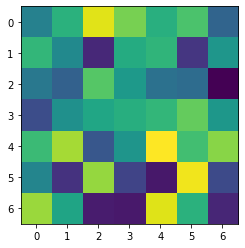

In [ ]:
plt.imshow(walkz[0])